# LSTM_Keras

In [0]:
!pip install tensorflow-gpu===2.1.0

     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 3.9MB 42.3MB/s 
     |████████████████████████████████| 450kB 62.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split




In [0]:
df = pd.read_csv('http://linkededucation.com.br/temp/google_stock_price.csv')
df.head()

,Stock_Price
0,50.12
1,54.10
2,54.65
3,52.38
4,52.95


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 1 columns):
Stock_Price    3012 non-null float64
dtypes: float64(1)
memory usage: 23.7 KB


In [0]:
df['Stock_Price'].describe()

count    3012.000000
mean      334.310093
std       173.187205
min        49.950000
25%       218.045000
50%       283.315000
75%       443.000000
max       782.220000
Name: Stock_Price, dtype: float64

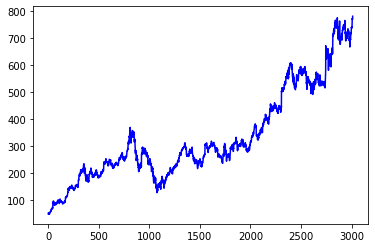

In [0]:
#Gráfico do ativo
plt.plot(df,color='blue')
plt.show()

In [0]:
#Criação das janelas de 8 dias no dataframe..inicializadas com zero
df['d1']=0.0
df['d2']=0.0
df['d3']=0.0
df['d4']=0.0
df['d5']=0.0
df['d6']=0.0
df['d7']=0.0
df['d8']=0.0
df['d9']=0.0
df['d10']=0.0
df['d11']=0.0
df['d12']=0.0
df['d13']=0.0
df['d14']=0.0
df['d1']=0.0
df['d2']=0.0
df['d3']=0.0
df['d4']=0.0
df['d5']=0.0
df['d6']=0.0
df['d15']=0.0
df['target']=0.0

df.head()

,Stock_Price,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,target
0,50.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#populando as janelas temporais
for i in range(2900):
  df.iloc[i,1]=df.iloc[i+1,0]
  df.iloc[i,2]=df.iloc[i+2,0]
  df.iloc[i,3]=df.iloc[i+3,0]
  df.iloc[i,4]=df.iloc[i+4,0]
  df.iloc[i,5]=df.iloc[i+5,0]
  df.iloc[i,6]=df.iloc[i+6,0]
  df.iloc[i,7]=df.iloc[i+7,0]
  df.iloc[i,8]=df.iloc[i+8,0]
  df.iloc[i,9]=df.iloc[i+9,0]
  df.iloc[i,10]=df.iloc[i+10,0]
  df.iloc[i,11]=df.iloc[i+11,0]
  df.iloc[i,12]=df.iloc[i+12,0]
  df.iloc[i,13]=df.iloc[i+13,0]
  df.iloc[i,14]=df.iloc[i+14,0]
  df.iloc[i,15]=df.iloc[i+15,0]
  df.iloc[i,16]=df.iloc[i+16,0]

ndf=df[:2800].copy()
y=np.array(ndf['target'])
ndf=ndf.drop(columns='target',axis=1)
ndf.rename(columns={"Stock_Price": "d0"},inplace=True)
ndf.head()

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15
0,50.12,54.10,54.65,52.38,52.95,53.90,53.02,50.95,51.13,50.07,50.70,49.95,50.74,51.10,51.10,52.61
1,54.10,54.65,52.38,52.95,53.90,53.02,50.95,51.13,50.07,50.70,49.95,50.74,51.10,51.10,52.61,53.70
2,54.65,52.38,52.95,53.90,53.02,50.95,51.13,50.07,50.70,49.95,50.74,51.10,51.10,52.61,53.70,55.69
3,52.38,52.95,53.90,53.02,50.95,51.13,50.07,50.70,49.95,50.74,51.10,51.10,52.61,53.70,55.69,55.94
4,52.95,53.90,53.02,50.95,51.13,50.07,50.70,49.95,50.74,51.10,51.10,52.61,53.70,55.69,55.94,56.93


In [0]:
X=np.array(ndf)
print(X.shape)
print(X[:3])
print(X.shape)
X=X[:,:,np.newaxis]
print(X.shape)
X[:3],y[:3]

(2800, 16)
[[50.12 54.1  54.65 52.38 52.95 53.9  53.02 50.95 51.13 50.07 50.7  49.95
  50.74 51.1  51.1  52.61]
 [54.1  54.65 52.38 52.95 53.9  53.02 50.95 51.13 50.07 50.7  49.95 50.74
  51.1  51.1  52.61 53.7 ]
 [54.65 52.38 52.95 53.9  53.02 50.95 51.13 50.07 50.7  49.95 50.74 51.1
  51.1  52.61 53.7  55.69]]
(2800, 16)
(2800, 16, 1)


(array([[[50.12],
         [54.1 ],
         [54.65],
         [52.38],
         [52.95],
         [53.9 ],
         [53.02],
         [50.95],
         [51.13],
         [50.07],
         [50.7 ],
         [49.95],
         [50.74],
         [51.1 ],
         [51.1 ],
         [52.61]],
 
        [[54.1 ],
         [54.65],
         [52.38],
         [52.95],
         [53.9 ],
         [53.02],
         [50.95],
         [51.13],
         [50.07],
         [50.7 ],
         [49.95],
         [50.74],
         [51.1 ],
         [51.1 ],
         [52.61],
         [53.7 ]],
 
        [[54.65],
         [52.38],
         [52.95],
         [53.9 ],
         [53.02],
         [50.95],
         [51.13],
         [50.07],
         [50.7 ],
         [49.95],
         [50.74],
         [51.1 ],
         [51.1 ],
         [52.61],
         [53.7 ],
         [55.69]]]), array([53.7 , 55.69, 55.94]))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100,input_shape=(None,1)))
model.add(tf.keras.layers.Dense(1,activation=lambda x:x))

In [0]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='mse')

In [0]:
model.layers[2].get_config()

{'activation': '<lambda>',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_1',
 'trainable': True,
 'units': 1,
 'use_bias': True}

In [0]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Train on 1960 samples
Epoch 1/500
1960/1960 [==============================] - 7s 4ms/sample - loss: 114241.2432
Epoch 2/500
1960/1960 [==============================] - 0s 124us/sample - loss: 109555.0732
Epoch 3/500
1960/1960 [==============================] - 0s 118us/sample - loss: 104676.7283
Epoch 4/500
1960/1960 [==============================] - 0s 139us/sample - loss: 100537.2466
Epoch 5/500
1960/1960 [==============================] - 0s 139us/sample - loss: 97108.5344
Epoch 6/500
1960/1960 [==============================] - 0s 124us/sample - loss: 94046.7050
Epoch 7/500
1960/1960 [==============================] - 0s 130us/sample - loss: 91135.8024
Epoch 8/500
1960/1960 [==============================] - 0s 127us/sample - loss: 88261.1978
Epoch 9/500
1960/1960 [==============================] - 0s 131us/sample - loss: 85592.4658
Epoch 10/500
1960/1960 [==============================] - 0s 126us/sample - loss: 83044.7988
Epoch 11/500
1960/1960 [==============================]

In [0]:
model.evaluate(X_test,y_test)

840/840 [==============================] - 0s 371us/sample - loss: 52.4970


52.49696638924735

In [0]:
model.predict(np.array([[[50.12],[54.10],[54.65],[52.38]]]))

array([[85.539085]], dtype=float32)

In [0]:
#crie um modelo MLP para comparar
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(500,activation='relu',input_shape=(1,16)))
model1.add(tf.keras.layers.Dense(1,activation=lambda x:x))

In [0]:
model1.compile(optimizer='adam',loss='mse')

In [0]:
model.layers[1].get_config()

In [0]:
X_train2=X_train.reshape((1960,1,16))
X_train2.shape

(1960, 1, 16)

In [0]:
# fit model

model1.fit(X_train2, y_train,epochs=500, verbose=1)

Train on 1960 samples
Epoch 1/500
1960/1960 [==============================] - 0s 235us/sample - loss: 3830.5581
Epoch 2/500
1960/1960 [==============================] - 0s 89us/sample - loss: 172.6052
Epoch 3/500
1960/1960 [==============================] - 0s 95us/sample - loss: 168.0382
Epoch 4/500
1960/1960 [==============================] - 0s 93us/sample - loss: 157.2513
Epoch 5/500
1960/1960 [==============================] - 0s 99us/sample - loss: 158.6100
Epoch 6/500
1960/1960 [==============================] - 0s 108us/sample - loss: 135.5764
Epoch 7/500
1960/1960 [==============================] - 0s 104us/sample - loss: 119.2341
Epoch 8/500
1960/1960 [==============================] - 0s 121us/sample - loss: 109.3514
Epoch 9/500
1960/1960 [==============================] - 0s 102us/sample - loss: 101.5188
Epoch 10/500
1960/1960 [==============================] - 0s 99us/sample - loss: 93.0725
Epoch 11/500
1960/1960 [==============================] - 0s 104us/sample - loss: 

In [0]:
X_test2=X_test.reshape((840,1,16))
model1.evaluate(X_test2,y_test)

840/840 [==============================] - 0s 175us/sample - loss: 71.3328


71.3327880132766

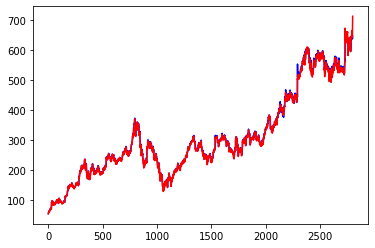

In [0]:
ye=model.predict(X)
import matplotlib.pyplot as plt
plt.plot(ye,color='blue')
plt.plot(y,color='red')
plt.show()

In [0]:

X1=X.reshape((2800,1,16))
X1[:3]

array([[[50.12, 54.1 , 54.65, 52.38, 52.95, 53.9 , 53.02, 50.95, 51.13,
         50.07, 50.7 , 49.95, 50.74, 51.1 , 51.1 , 52.61]],

       [[54.1 , 54.65, 52.38, 52.95, 53.9 , 53.02, 50.95, 51.13, 50.07,
         50.7 , 49.95, 50.74, 51.1 , 51.1 , 52.61, 53.7 ]],

       [[54.65, 52.38, 52.95, 53.9 , 53.02, 50.95, 51.13, 50.07, 50.7 ,
         49.95, 50.74, 51.1 , 51.1 , 52.61, 53.7 , 55.69]]])

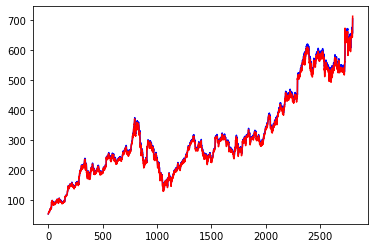

In [0]:
ye1=model1.predict(X1).reshape((2800,))
plt.plot(ye1,color='blue')
plt.plot(y,color='red')
plt.show()



In [0]:
ye1

array([[[ 51.737476]],

       [[ 51.792435]],

       [[ 50.77785 ]],

       ...,

       [[646.83093 ]],

       [[650.2632  ]],

       [[656.0168  ]]], dtype=float32)

In [0]:
ye1.shape

(2800, 8, 1)